In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.patches as mpatches
from psynlig import pca_2d_scores
import matplotlib.patches as mpatches
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [83]:
#with open("../data_obtain/outliers.txt", 'r') as f:
#    outliers = [line.rstrip('\n') for line in f]

In [84]:
emma_data = pd.read_csv('../data/FullData.txt', sep='\t')

In [85]:
emma_data.head()

,Order,Family,Strand,Species,-,A,C,D,E,F,...,N,P,Q,R,S,T,V,Y,W,X
Alphaflexiviridae_u17540|Narcissus,Tymovirales,Alphaflexiviridae,positive,u17540|Narcissus,230,12,1,8,5,7,...,5,2,4,2,3,8,2,4,0,0
Alphaflexiviridae_u17602,Tymovirales,Alphaflexiviridae,positive,u17602,230,9,1,8,5,6,...,4,3,5,2,5,7,4,4,1,0
Alphaflexiviridae_u4329|Lily,Tymovirales,Alphaflexiviridae,positive,u4329|Lily,230,11,2,7,5,5,...,3,3,7,1,4,7,2,4,0,0
Alphaflexiviridae_u6633|Papaya,Tymovirales,Alphaflexiviridae,positive,u6633|Papaya,230,11,1,8,5,7,...,4,3,4,1,4,9,2,2,0,0
Alphaflexiviridae_u11143,Tymovirales,Alphaflexiviridae,positive,u11143,230,10,1,8,6,9,...,5,3,4,2,3,7,5,4,0,0


In [86]:
emma_data['Strand'].unique()

array(['positive ', 'double', 'negative'], dtype=object)

In [87]:
viruses_eq = pd.read_csv('../data/aminoacid_eq_freq_all_virus.csv')
viruses_aa_freq = pd.read_csv('../data/aminoacid_freq_all_virus.csv')
viruses_type = pd.read_csv('../data/taxid_virus_type.csv', index_col=0)

d = {'C': 'Cys', 'D': 'Asp', 'S': 'Ser', 'Q': 'Gln', 'K': 'Lys',
     'I': 'Ile', 'P': 'Pro', 'T': 'Thr', 'F': 'Phe', 'N': 'Asn', 
     'G': 'Gly', 'H': 'His', 'L': 'Leu', 'R': 'Arg', 'W': 'Trp', 
     'A': 'Ala', 'V':'Val', 'E': 'Glu', 'Y': 'Tyr', 'M': 'Met'}

viruses_aa_freq.columns = [d[col] if col in d else col for col in viruses_aa_freq.columns]
viruses_eq.columns = [d[col] if col in d else col for col in viruses_eq.columns]
emma_data.columns = [d[col] if col in d else col for col in emma_data.columns]

In [88]:
viruses_eq.head()

,taxid,Ala,Arg,Asn,Asp,Cys,Gln,Glu,Gly,His,...,Leu,Lys,Met,Phe,Pro,Ser,Thr,Trp,Tyr,Val
0,10407,0.059210,0.080345,0.033741,0.027613,0.031618,0.031575,0.021135,0.039762,0.041180,...,0.117514,0.025728,0.013406,0.044461,0.088078,0.110885,0.072755,0.010922,0.038877,0.055946
1,10990,0.022529,0.030072,0.029765,0.016467,0.038834,0.014140,0.007543,0.012196,0.030936,...,0.181103,0.013792,0.011718,0.159932,0.041474,0.123110,0.045076,0.006091,0.069103,0.056643
2,11082,0.055157,0.079762,0.033672,0.030789,0.038733,0.028378,0.024606,0.050760,0.032109,...,0.119644,0.026766,0.017244,0.051881,0.054356,0.104354,0.060487,0.015782,0.042462,0.071759
3,11320,0.032330,0.091079,0.068530,0.036377,0.021084,0.039971,0.058749,0.045838,0.024603,...,0.074964,0.112241,0.022854,0.022921,0.022421,0.073775,0.064574,0.011201,0.039634,0.055139
4,11983,0.054221,0.075625,0.035377,0.027691,0.033093,0.030276,0.021404,0.038329,0.039170,...,0.122330,0.027288,0.014397,0.050699,0.076703,0.110759,0.069446,0.011231,0.042423,0.058721


In [89]:
viruses_type.head()

,taxid,species,host,gene,comment,Type
0,38170,Avian orthoreovirus__38170,NaN,NaN,NaN,ds
1,1157337,Piscine orthoreovirus__1157337,NaN,NaN,NaN,ds
2,351073,Mammalian orthoreovirus__351073,NaN,NaN,NaN,ds
3,40054,Epizootic hemorrhagic disease virus__40054,NaN,NaN,NaN,ds
4,10990,Rice black streaked dwarf virus__10990,Avena sativa,P1 protein,NaN,ds


In [90]:
viruses_type['taxid'] = viruses_type['taxid'].apply(str)
viruses_eq['taxid'] = viruses_eq['taxid'].apply(str)
viruses_aa_freq['taxid'] = viruses_aa_freq['taxid'].apply(str)

viruses_type = viruses_type[['taxid', 'Type']]

In [91]:
# viruses_eq.loc[viruses_eq['taxid'] == '118655(1933309)','taxid'] = '118655'
# viruses_type.loc[viruses_type['taxid'] == '1933309','taxid'] = '118655'

# viruses_eq.loc[viruses_eq['taxid'] == '54290_1985356','taxid'] = '54290'
# viruses_type.loc[viruses_type['taxid'] == '1985356','taxid'] = '54290'

# viruses_type.loc[viruses_type['taxid'] == '113201','taxid'] = '11320_1'
# viruses_type.loc[viruses_type['taxid'] == '113202','taxid'] = '11320_2'
        
# viruses_type.loc[len(viruses_type)] = ["3052493", '-']
# viruses_type.loc[len(viruses_type)] = ["1133363", '-']
# viruses_type.loc[len(viruses_type)] = ["3052763", '-']

In [92]:
# viruses_aa_freq.loc[viruses_aa_freq['taxid'] == '11320','taxid'] = '11320_1'
# new_raw = viruses_aa_freq[viruses_aa_freq['taxid'] == '11320_1']
# new_raw['taxid'] = '11320_2'
# viruses_aa_freq = viruses_aa_freq.append(new_raw)

In [93]:
viruses_aa_freq = viruses_aa_freq[viruses_aa_freq['taxid'].isin(list(viruses_eq['taxid'].unique()))]

In [94]:
viruses_aa_freq['taxid'].unique()

array(['10990', '11082', '11320', '1133363', '1157337', '118655', '11983',
       '12110', '12162', '12637', '138948', '138950', '138951', '162145',
       '1678143', '1933178', '198112', '28295', '28344', '3052493',
       '3052763', '351073', '38170', '40054', '54290', '57482', '693997',
       '694014', '77763'], dtype=object)

In [95]:
viruses_eq = viruses_eq.merge(viruses_type, how='left', on='taxid')

In [96]:
viruses_aa_freq = viruses_aa_freq.merge(viruses_type, how='left', on='taxid')

In [97]:
viruses_eq.loc[viruses_eq['Type'] == '+','Strand'] = 'positive '
viruses_eq.loc[viruses_eq['Type'] == '+','Species'] = 'Ideal positive'
viruses_eq.loc[viruses_eq['Type'] == '-','Strand'] = 'negative'
viruses_eq.loc[viruses_eq['Type'] == '-','Species'] = 'Ideal negative'
viruses_eq.loc[viruses_eq['Type'] == 'ds','Strand'] = 'double'
viruses_eq.loc[viruses_eq['Type'] == 'ds','Species'] = 'Ideal double'

viruses_eq = viruses_eq.drop(['Type'], axis=1)

viruses_aa_freq.loc[viruses_aa_freq['Type'] == '+','Strand'] = 'positive '
viruses_aa_freq.loc[viruses_aa_freq['Type'] == '+','Species'] = 'Ref positive'
viruses_aa_freq.loc[viruses_aa_freq['Type'] == '-','Strand'] = 'negative'
viruses_aa_freq.loc[viruses_aa_freq['Type'] == '-','Species'] = 'Ref negative'
viruses_aa_freq.loc[viruses_aa_freq['Type'] == 'ds','Strand'] = 'double'
viruses_aa_freq.loc[viruses_aa_freq['Type'] == 'ds','Species'] = 'Ref double'

viruses_aa_freq = viruses_aa_freq.drop(['Type'], axis=1)

In [98]:
viruses_eq.head()

,taxid,Ala,Arg,Asn,Asp,Cys,Gln,Glu,Gly,His,...,Met,Phe,Pro,Ser,Thr,Trp,Tyr,Val,Strand,Species
0,10407,0.059210,0.080345,0.033741,0.027613,0.031618,0.031575,0.021135,0.039762,0.041180,...,0.013406,0.044461,0.088078,0.110885,0.072755,0.010922,0.038877,0.055946,double,Ideal double
1,10990,0.022529,0.030072,0.029765,0.016467,0.038834,0.014140,0.007543,0.012196,0.030936,...,0.011718,0.159932,0.041474,0.123110,0.045076,0.006091,0.069103,0.056643,double,Ideal double
2,11082,0.055157,0.079762,0.033672,0.030789,0.038733,0.028378,0.024606,0.050760,0.032109,...,0.017244,0.051881,0.054356,0.104354,0.060487,0.015782,0.042462,0.071759,positive,Ideal positive
3,11320,0.032330,0.091079,0.068530,0.036377,0.021084,0.039971,0.058749,0.045838,0.024603,...,0.022854,0.022921,0.022421,0.073775,0.064574,0.011201,0.039634,0.055139,negative,Ideal negative
4,11983,0.054221,0.075625,0.035377,0.027691,0.033093,0.030276,0.021404,0.038329,0.039170,...,0.014397,0.050699,0.076703,0.110759,0.069446,0.011231,0.042423,0.058721,positive,Ideal positive


In [99]:
emma_data = emma_data.append(viruses_eq)
emma_data = emma_data.append(viruses_aa_freq)

C:\Users\voron\AppData\Local\Temp\ipykernel_10724\3709174602.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emma_data = emma_data.append(viruses_eq)
C:\Users\voron\AppData\Local\Temp\ipykernel_10724\3709174602.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emma_data = emma_data.append(viruses_aa_freq)


In [100]:
emma_data

,Order,Family,Strand,Species,-,Ala,Cys,Asp,Glu,Phe,...,Gln,Arg,Ser,Thr,Val,Tyr,Trp,X,taxid,refseq_id
Alphaflexiviridae_u17540|Narcissus,Tymovirales,Alphaflexiviridae,positive,u17540|Narcissus,230.0,12.000000,1.000000,8.000000,5.000000,7.000000,...,4.000000,2.000000,3.000000,8.000000,2.000000,4.000000,0.000000,0.0,NaN,NaN
Alphaflexiviridae_u17602,Tymovirales,Alphaflexiviridae,positive,u17602,230.0,9.000000,1.000000,8.000000,5.000000,6.000000,...,5.000000,2.000000,5.000000,7.000000,4.000000,4.000000,1.000000,0.0,NaN,NaN
Alphaflexiviridae_u4329|Lily,Tymovirales,Alphaflexiviridae,positive,u4329|Lily,230.0,11.000000,2.000000,7.000000,5.000000,5.000000,...,7.000000,1.000000,4.000000,7.000000,2.000000,4.000000,0.000000,0.0,NaN,NaN
Alphaflexiviridae_u6633|Papaya,Tymovirales,Alphaflexiviridae,positive,u6633|Papaya,230.0,11.000000,1.000000,8.000000,5.000000,7.000000,...,4.000000,1.000000,4.000000,9.000000,2.000000,2.000000,0.000000,0.0,NaN,NaN
Alphaflexiviridae_u11143,Tymovirales,Alphaflexiviridae,positive,u11143,230.0,10.000000,1.000000,8.000000,6.000000,9.000000,...,4.000000,2.000000,3.000000,7.000000,5.000000,4.000000,0.000000,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,NaN,NaN,positive,Ref positive,NaN,0.096763,0.032718,0.044205,0.044901,0.030282,...,0.021232,0.060564,0.069962,0.065437,0.096763,0.028194,0.026105,0.0,54290,GCF_000862005.1
25,NaN,NaN,negative,Ref negative,NaN,0.048306,0.017490,0.059967,0.054692,0.044420,...,0.031094,0.058856,0.096891,0.052748,0.057468,0.036091,0.016380,0.0,57482,GCF_000870765.1
26,NaN,NaN,positive,Ref positive,NaN,0.065341,0.031864,0.053517,0.049294,0.056588,...,0.029177,0.031864,0.068873,0.060580,0.091677,0.046453,0.011901,0.0,693997,GCF_002985995.1
27,NaN,NaN,positive,Ref positive,NaN,0.067754,0.032858,0.055364,0.047051,0.055599,...,0.035602,0.032936,0.066107,0.058736,0.096220,0.046424,0.013802,0.0,694014,GCF_000862965.1


In [101]:
#emma_data = emma_data[~(emma_data['taxid'].isin(outliers))]

In [102]:
#for_pca = emma_data[emma_data.columns[5:-3]].reset_index(drop=True)

In [103]:
#for_pca

In [104]:
# for_pca['total'] = for_pca.sum(axis=1)
# for col in emma_data[emma_data.columns[5:-3]].columns:
#     for_pca[col] = for_pca[col]/for_pca['total']
# for_pca = for_pca.drop('total',axis=1)
# for_pca = for_pca.fillna(0)

emma_data_train = emma_data[emma_data['taxid'].isna()]
emma_data_transform = emma_data
for_pca_train = emma_data_train[emma_data_train.columns[5:-3]].reset_index(drop=True)

for_pca_train['total'] = for_pca_train.sum(axis=1)
for col in emma_data[emma_data_train.columns[5:-3]].columns:
    for_pca_train[col] = for_pca_train[col]/for_pca_train['total']
for_pca_train = for_pca_train.drop('total',axis=1)
for_pca_train = for_pca_train.fillna(0)

for_pca_transform = emma_data_transform[emma_data_transform.columns[5:-3]].reset_index(drop=True)
for_pca_transform['total'] = for_pca_transform.sum(axis=1)
for col in emma_data[emma_data_transform.columns[5:-3]].columns:
    for_pca_transform[col] = for_pca_transform[col]/for_pca_transform['total']
for_pca_transform = for_pca_transform.drop('total',axis=1)
for_pca_transform = for_pca_transform.fillna(0)

model = PCA(n_components=2)
pca_fit = model.fit(for_pca_train)
pca_model = pca_fit.transform(for_pca_transform)
#pca_data = pd.DataFrame(pca_model, columns=["pc"+str(i+1) for i in range(len(for_pca.columns))])
pca_data = pd.DataFrame(pca_model, columns=["pc1", 'pc2'])
pca_data1 = pca_data[["pc1","pc2"]].copy()

In [105]:
pca_data1['Family'] = emma_data['Family'].reset_index(drop=True)

In [106]:
#for_pca.sum(axis=1)

In [107]:
# model = PCA()
# pca_fit = model.fit(for_pca)
# pca_model = pca_fit.transform(for_pca)
# pca_data = pd.DataFrame(pca_model, columns=["pc"+str(i+1) for i in range(len(for_pca.columns))])
# pca_data1 = pca_data[["pc1","pc2"]].copy()

In [123]:
pca_data1['strand'] = emma_data['Strand'].to_list()
pca_data1['Species'] = emma_data['Species'].to_list()
pca_data1['taxid'] = emma_data['taxid'].to_list()
pca_data1.loc[pca_data1['Family']=='Coronaviridae','strand'] = 'positive Coronaviridae'

In [124]:
pca_data1.loc[pca_data1['taxid'].isin(['694014', '693997']),'strand'] = 'positive Coronaviridae'

In [125]:
pca_data1.head()

,pc1,pc2,Family,strand,Species,taxid
0,-0.060250,0.047407,Alphaflexiviridae,positive,u17540|Narcissus,NaN
1,-0.035631,0.021335,Alphaflexiviridae,positive,u17602,NaN
2,-0.063203,0.058963,Alphaflexiviridae,positive,u4329|Lily,NaN
3,-0.048359,0.023579,Alphaflexiviridae,positive,u6633|Papaya,NaN
4,-0.043153,0.039009,Alphaflexiviridae,positive,u11143,NaN


In [126]:
ref_data = pca_data1[pca_data1['Species'].isin(['Ref negative', 'Ref positive', 'Ref double'])]
ideal_data = pca_data1[pca_data1['Species'].isin(['Ideal negative', 'Ideal positive', 'Ideal double'])]

In [127]:
viruses_short_names = pd.read_csv('../data/viral_spectra_dataset.csv')
viruses_short_names['taxid'] = viruses_short_names['taxid'].apply(str)

In [128]:
viruses_short_names = viruses_short_names[['taxid', 'virusname']]

In [129]:
ideal_data = ideal_data.merge(viruses_short_names, how='left', on='taxid')

In [131]:
sum_vectors = ideal_data[['pc1', 'pc2', 'strand', 'taxid']].rename(columns={'pc1': 'pc1_fin', 'pc2': 'pc2_fin'})
sum_vectors = sum_vectors.merge(ref_data[['pc1', 'pc2', 'taxid']], how='left', on='taxid')

In [132]:
sum_vectors['x'] = sum_vectors['pc1_fin'] - sum_vectors['pc1']
sum_vectors['y'] = sum_vectors['pc2_fin'] - sum_vectors['pc2']

In [133]:
sum_vectors = sum_vectors[['x', 'y', 'strand']].groupby('strand').mean().reset_index()

In [134]:
sum_vectors

,strand,x,y
0,double,0.024995,-0.049166
1,negative,0.006119,-0.010608
2,positive,0.026317,-0.048639
3,positive Coronaviridae,0.012687,-0.111720


In [140]:
pca_data1[pca_data1['Family'] == 'Coronaviridae']

,pc1,pc2,Family,strand,Species,taxid
7617,-0.025263,0.031836,Coronaviridae,positive Coronaviridae,u22027|Alphacoronavirus,NaN
7618,-0.002905,0.015996,Coronaviridae,positive Coronaviridae,u16828,NaN
7619,-0.014906,0.017425,Coronaviridae,positive Coronaviridae,u27799,NaN
7620,0.012998,0.003653,Coronaviridae,positive Coronaviridae,u13393,NaN
7621,-0.003931,0.049098,Coronaviridae,positive Coronaviridae,u30878|Severe,NaN
...,...,...,...,...,...,...
7693,-0.016073,0.001183,Coronaviridae,positive Coronaviridae,u111898,NaN
7694,-0.026296,0.011413,Coronaviridae,positive Coronaviridae,u148547,NaN
7695,-0.051201,0.029883,Coronaviridae,positive Coronaviridae,u144146,NaN
7696,-0.038543,0.040854,Coronaviridae,positive Coronaviridae,u244803,NaN


C:\Users\voron\AppData\Local\Temp\ipykernel_10724\2953874216.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ideal_genomes.loc[ideal_genomes['strand']=='positive ', 'color'] = 'green'


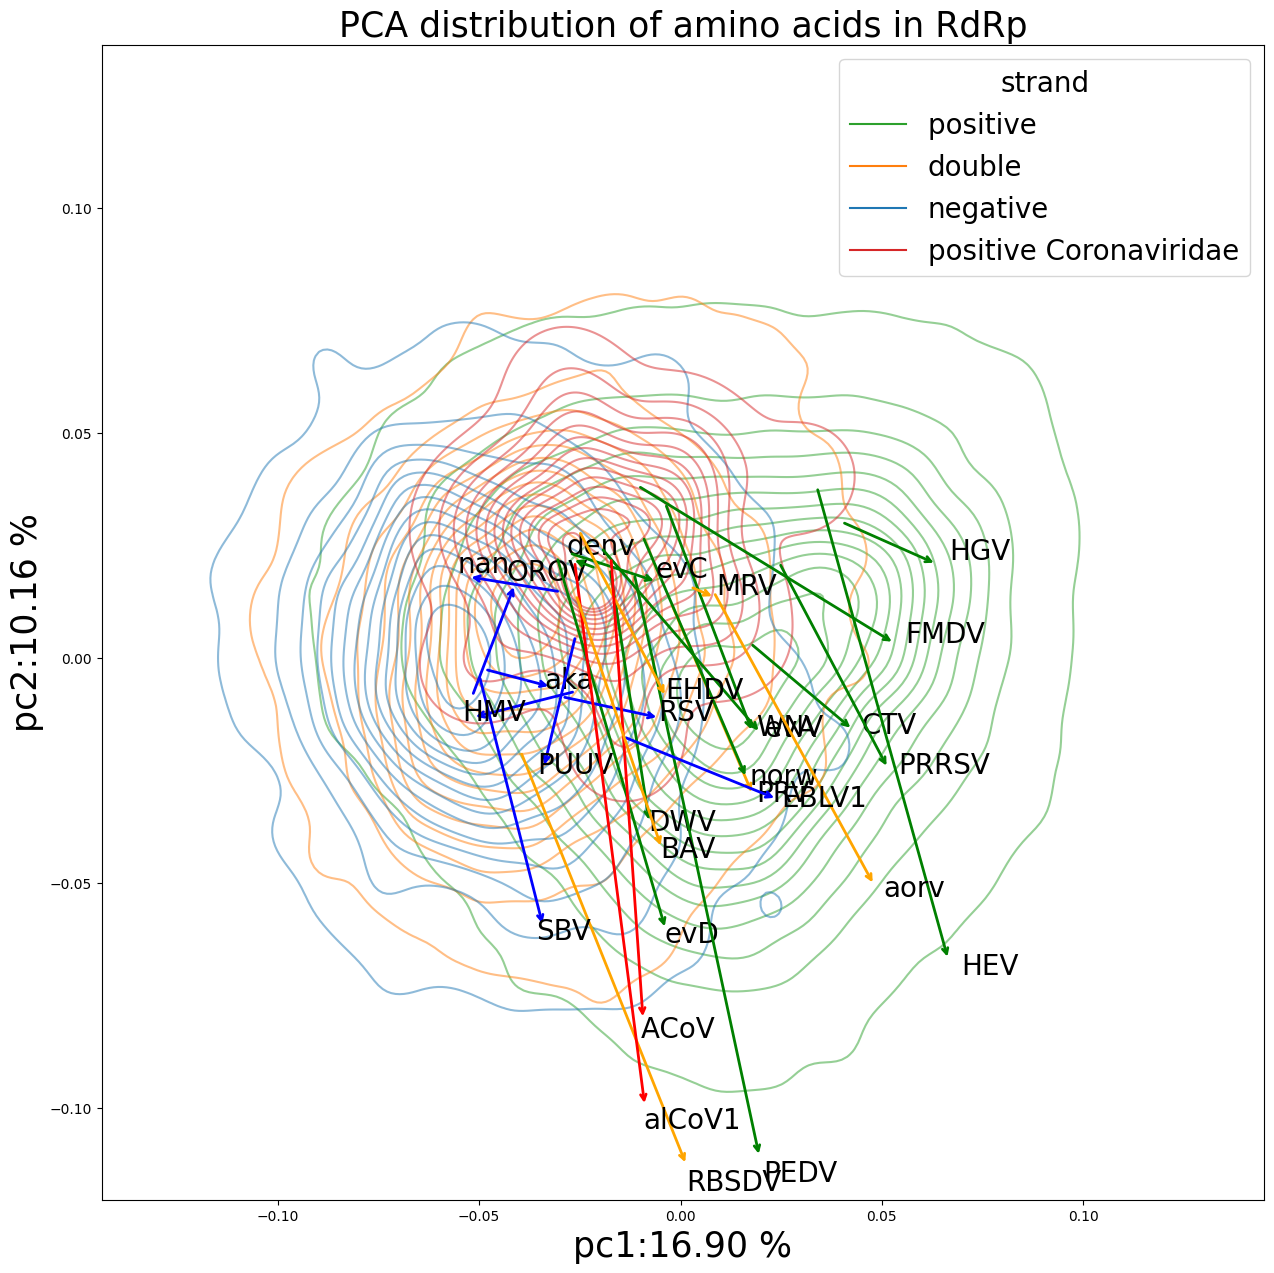

In [143]:
palette = {
    'double': 'tab:orange',
    'positive ': 'tab:green',
    'negative': 'tab:blue',
    'positive Coronaviridae' : 'tab:red'
}
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams['legend.fontsize'] = 20
plt.rcParams["legend.title_fontsize"] = 20
#plt.xlim([-0.2,0.2]) 
#plt.ylim([-0.2,0.2])
#g=sns.jointplot(data=pca_data1, x="pc1", y="pc2", hue="strand", alpha=0.05, palette=palette)#, xlim = (-10,12), ylim = (-10,10))
g=sns.kdeplot(data=pca_data1[pca_data1['taxid'].isna()], x="pc1", y="pc2", hue="strand", alpha=0.5, palette=palette, legend=True, thresh=0.01, levels=15, common_norm=False)#, xlim = (-10,12), ylim = (-10,10))

ideal_genomes = pca_data1[pca_data1['Species'].isin(['Ideal positive','Ideal negative','Ideal double'])]
ideal_genomes.loc[ideal_genomes['strand']=='positive ', 'color'] = 'green'
ideal_genomes.loc[ideal_genomes['strand']=='positive Coronaviridae ', 'color'] = 'red'
ideal_genomes.loc[ideal_genomes['strand']=='double', 'color'] = 'orange'
ideal_genomes.loc[ideal_genomes['strand']=='negative', 'color'] = 'blue'
xs = ideal_genomes['pc1']
ys = ideal_genomes['pc2']
colors = ideal_genomes['color']

#plt.legend(fontsize='x-large', title_fontsize='40') 
# plot the points
#plt.scatter(xs,ys, c=colors)
#plt.legend(["positive" , "negative", 'double'])
#plt.legend()

for index, row in ref_data.iterrows():
    ref_index = ref_data['taxid'][index]
    x_start = ref_data['pc1'][index]
    y_start = ref_data['pc2'][index]
    x_finish = ideal_data.loc[ideal_data['taxid'] == ref_index, 'pc1'].values[0]
    y_finish = ideal_data.loc[ideal_data['taxid'] == ref_index, 'pc2'].values[0]
    virus_short_name = ideal_data.loc[ideal_data['taxid'] == ref_index, 'virusname'].values[0]
    if ref_data['strand'][index]=='positive ':
        color='green'
    elif ref_data['strand'][index]=='double':
        color='orange'
    elif ref_data['strand'][index]=='negative':
        color='blue'
    elif ref_data['strand'][index]=='positive Coronaviridae':
        color='red'
    plt.annotate("",
            xy=(x_finish, y_finish), xycoords='data',
            xytext=(x_start, y_start), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=2, 
                            color=color))
    plt.text(x_finish * 1.05, 
                    y_finish * 1.05, 
                    virus_short_name, fontsize=20)
    
# for strand in sum_vectors['strand']:
#     x_start = 0
#     y_start = 0
#     x_finish = sum_vectors[sum_vectors['strand'] == strand]['x'].values[0]
#     y_finish = sum_vectors[sum_vectors['strand'] == strand]['y'].values[0]
#     if strand=='positive ':
#         color='green'
#     elif strand=='double':
#         color='orange'
#     elif strand=='negative':
#         color='blue'
#     plt.annotate("",
#             xy=(x_finish, y_finish), xycoords='data',
#             xytext=(x_start, y_start), textcoords='data',
#             arrowprops=dict(arrowstyle="->", linewidth=6, 
#                             color=color, alpha=0.2))




#for aa_num in range(len(list(emma_data.columns[5:]))):
#    aa = list(emma_data.columns[5:])[aa_num]
#    coords = np.transpose(model.components_[0:2, :])[aa_num]
#    plt.annotate('default line', xy=(0,0), xytext=(coords[0],coords[1]),
#            arrowprops={'arrowstyle': '-'}, va='center')
#plt.legend(title='')

plt.xlabel("pc1:" + "{:.2f}".format(model.explained_variance_ratio_[0] * 100) + " %", fontsize=25)
plt.ylabel("pc2:" + "{:.2f}".format(model.explained_variance_ratio_[1] * 100) + " %", fontsize=25)

plt.title("PCA distribution of amino acids in RdRp", fontsize=25) 
plt.savefig('../figures/pca_emmadata_allviruses_cov.pdf', dpi=300, bbox_inches = 'tight')
plt.show()
plt.close()


In [116]:
for_pca = emma_data[emma_data.columns[5:-3]].reset_index(drop=True)
for_pca['total'] = for_pca.sum(axis=1)
for col in emma_data[emma_data.columns[5:-3]].columns:
    for_pca[col] = for_pca[col]/for_pca['total']
for_pca = for_pca.drop('total',axis=1)
for_pca = for_pca.fillna(0)

emma_data_train = emma_data[emma_data['taxid'].isna()]
emma_data_transform = emma_data
for_pca_train = emma_data_train[emma_data_train.columns[5:-3]].reset_index(drop=True)

for_pca_train['total'] = for_pca_train.sum(axis=1)
for col in emma_data[emma_data_train.columns[5:-3]].columns:
    for_pca_train[col] = for_pca_train[col]/for_pca_train['total']
for_pca_train = for_pca_train.drop('total',axis=1)
for_pca_train = for_pca_train.fillna(0)

for_pca_transform = emma_data_transform[emma_data_transform.columns[5:-3]].reset_index(drop=True)
for_pca_transform['total'] = for_pca_transform.sum(axis=1)
for col in emma_data[emma_data_transform.columns[5:-3]].columns:
    for_pca_transform[col] = for_pca_transform[col]/for_pca_transform['total']
for_pca_transform = for_pca_transform.drop('total',axis=1)
for_pca_transform = for_pca_transform.fillna(0)

In [117]:
lda = LDA(n_components=2)
lda.fit(for_pca_train, emma_data_train['Strand'])

LinearDiscriminantAnalysis(n_components=2)

In [118]:
X_lda = lda.transform(for_pca_transform)

In [119]:
X_lda

array([[-1.62730549,  2.42051291],
       [-1.75353055,  1.05411473],
       [-2.77096161,  2.09317382],
       ...,
       [-0.36173424, -1.30022876],
       [-1.01056672, -1.12609998],
       [-1.58472031, -2.37949046]])

In [120]:
lda_data = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])

In [121]:
lda_data['strand'] = emma_data['Strand'].to_list()
lda_data['Species'] = emma_data['Species'].to_list()
lda_data['taxid'] = emma_data['taxid'].to_list()

In [122]:
ref_data = lda_data[lda_data['Species'].isin(['Ref negative', 'Ref positive', 'Ref double'])]
ideal_data = lda_data[lda_data['Species'].isin(['Ideal negative', 'Ideal positive', 'Ideal double'])]

C:\Users\voron\AppData\Local\Temp\ipykernel_10220\3465588984.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ideal_genomes.loc[ideal_genomes['strand']=='positive ', 'color'] = 'green'
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


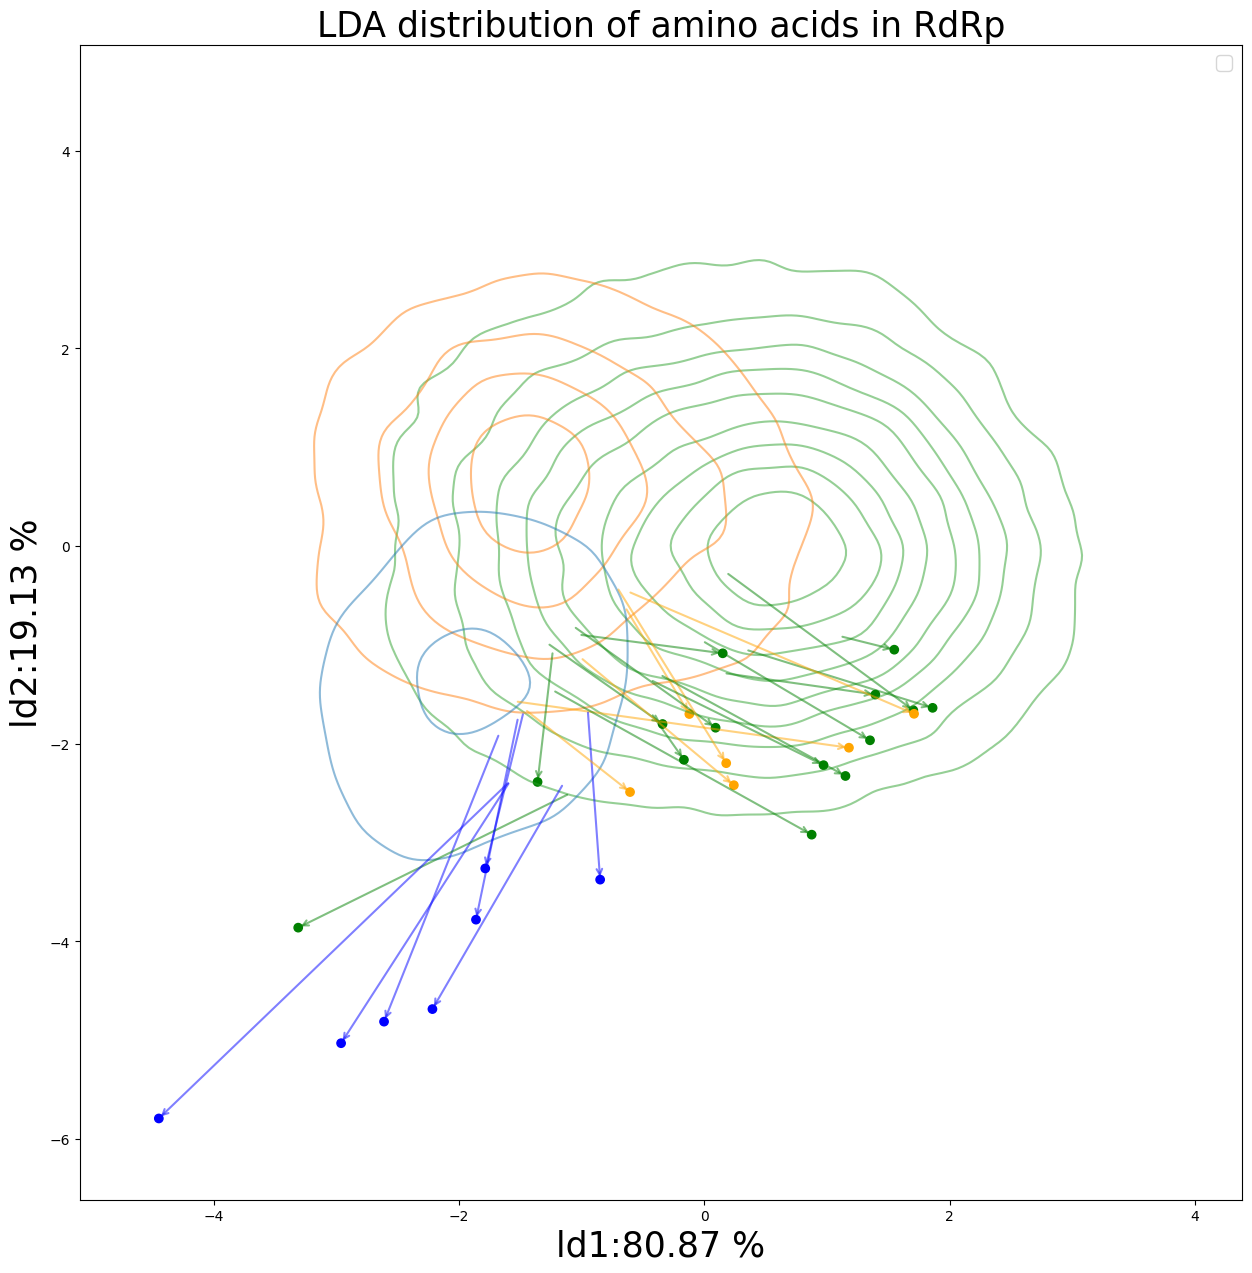

In [129]:
palette = {
    'double': 'tab:orange',
    'positive ': 'tab:green',
    'negative': 'tab:blue'
}
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams["figure.figsize"] = (15,15)
g=sns.kdeplot(data=lda_data, x="LD1", y="LD2", hue="strand", alpha=0.5, palette=palette, legend=True)#, xlim = (-10,12), ylim = (-10,10))
#g.fig.set_figwidth(15)
#g.fig.set_figheight(15)

#x_mean = lda_data[lda_data['strand']=='positive ']["LD1"].mean()
#x_std = lda_data[lda_data['strand']=='positive ']["LD1"].std()
#g.ax_marg_x.axvspan(x_mean - x_std, x_mean + x_std, color='blue', alpha=0.1)
#y_mean = lda_data[lda_data['strand']=='positive ']["LD2"].mean()
#y_std = lda_data[lda_data['strand']=='positive ']["LD2"].std()
#g.ax_marg_y.axhspan(y_mean - y_std, y_mean + y_std, color='blue', alpha=0.1)
#g.refline(x=x_mean, y=y_mean, color='green', ls='--')

#x_mean = lda_data[lda_data['strand']=='double']["LD1"].mean()
#x_std = lda_data[lda_data['strand']=='double']["LD1"].std()
#g.ax_marg_x.axvspan(x_mean - x_std, x_mean + x_std, color='orange', alpha=0.1)
#y_mean = lda_data[lda_data['strand']=='double']["LD2"].mean()
#y_std = lda_data[lda_data['strand']=='double']["LD2"].std()
#g.ax_marg_y.axhspan(y_mean - y_std, y_mean + y_std, color='orange', alpha=0.1)
#g.refline(x=x_mean, y=y_mean, color='orange', ls='--')

#x_mean = lda_data[lda_data['strand']=='negative']["LD1"].mean()
#x_std = lda_data[lda_data['strand']=='negative']["LD1"].std()
#g.ax_marg_x.axvspan(x_mean - x_std, x_mean + x_std, color='green', alpha=0.1)
#y_mean = lda_data[lda_data['strand']=='negative']["LD2"].mean()
#y_std = lda_data[lda_data['strand']=='negative']["LD2"].std()
#g.ax_marg_y.axhspan(y_mean - y_std, y_mean + y_std, color='green', alpha=0.1)
#g.refline(x=x_mean, y=y_mean, color='blue', ls='--')


ideal_genomes = lda_data[lda_data['Species'].isin(['Ideal positive','Ideal negative','Ideal double'])]
ideal_genomes.loc[ideal_genomes['strand']=='positive ', 'color'] = 'green'
ideal_genomes.loc[ideal_genomes['strand']=='double', 'color'] = 'orange'
ideal_genomes.loc[ideal_genomes['strand']=='negative', 'color'] = 'blue'
xs = ideal_genomes['LD1']
ys = ideal_genomes['LD2']
colors = ideal_genomes['color']

# plot the points
plt.scatter(xs,ys, c=colors)

for index, row in ref_data.iterrows():
    ref_index = ref_data['taxid'][index]
    x_start = ref_data['LD1'][index]
    y_start = ref_data['LD2'][index]
    x_finish = ideal_data.loc[ideal_data['taxid'] == ref_index, 'LD1'].values[0]
    y_finish = ideal_data.loc[ideal_data['taxid'] == ref_index, 'LD2'].values[0]
    if ref_data['strand'][index] == 'positive ':
        color = 'green'
    elif ref_data['strand'][index] == 'double':
        color = 'orange'
    elif ref_data['strand'][index] == 'negative':
        color = 'blue'
    plt.annotate("",
            xy=(x_finish, y_finish), xycoords='data',
            xytext=(x_start, y_start), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=1.5, 
                            color=color, alpha=0.5))




#for aa_num in range(len(list(emma_data.columns[5:]))):
#    aa = list(emma_data.columns[5:])[aa_num]
#    coords = np.transpose(model.components_[0:2, :])[aa_num]
#    plt.annotate('default line', xy=(0,0), xytext=(coords[0],coords[1]),
#            arrowprops={'arrowstyle': '-'}, va='center')


plt.xlabel("ld1:" + "{:.2f}".format(lda.explained_variance_ratio_[0] * 100) + " %", fontsize=25)
plt.ylabel("ld2:" + "{:.2f}".format(lda.explained_variance_ratio_[1] * 100) + " %", fontsize=25)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title("LDA distribution of amino acids in RdRp", fontsize=25) 
#g.fig.suptitle("LDA distribution of amino acids in RdRp", fontsize=25, x=0.5, y=1) 
plt.savefig('../figures/lda_emmadata_allviruses.pdf', dpi=300, bbox_inches = 'tight')
plt.show()
plt.close()


In [126]:
ref_data['strand'].unique()

array(['double', 'positive ', 'negative'], dtype=object)

In [179]:
lda_data[(lda_data['strand'] == 'positive ') & (lda_data['taxid'].notna()) & (lda_data['LD1']<-1)]

,LD1,LD2,strand,Species,taxid
77218,-3.320184,-3.858302,positive,Ideal positive,12637
77220,-1.365789,-2.380167,positive,Ideal positive,138950
77241,-1.278996,-0.976788,positive,Ref positive,11983
77242,-1.024024,-0.893243,positive,Ref positive,12110
77244,-1.101009,-2.500438,positive,Ref positive,12637
77245,-1.066878,-0.807635,positive,Ref positive,138948
77246,-1.236713,-1.055112,positive,Ref positive,138950
77250,-1.238273,-1.453676,positive,Ref positive,198112


In [173]:
feature_importance = np.abs(lda.coef_).sum(axis=0)
feature_names = for_pca.columns

importance_df = pd.DataFrame({'aa':feature_names, 'importance':feature_importance})
importance_df = importance_df.sort_values(by=['importance'], ascending=False).reset_index(drop=True)

importance_df.to_csv('../data_obtain/importance_lda.csv')

In [119]:
# coordinates of samples (i.e., scores; let's take the first two axes)
scores = pca_model[:, :2]

# coordinates of features (i.e., loadings; note the transpose)
loadings = model.components_[:2].T

# proportions of variance explained by axes
pvars = model.explained_variance_ratio_[:2] * 100

In [120]:
arrows = loadings * np.abs(scores).max(axis=0)

In [121]:
palette = {
    'double': 'tab:orange',
    'positive ': 'tab:green',
    'negative': 'tab:blue'
}
pos_gainers = ['S', 'R', 'C']
pos_loosers = ['A', 'T', 'D', 'E']

neg_gainers = ['R', 'Y', 'I', 'H', 'N']
neg_loosers = ['M', 'A', 'D', 'E']

ds_gainers = ['S', 'L', 'F', 'R', 'C', 'H']
ds_loosers = ['A', 'M', 'D', 'E', 'N', 'K']

plt.figure(figsize=(15, 15))

sns.scatterplot(data=pca_data1, 
                x="pc1", 
                y="pc2", 
               hue=pca_data1['strand'], alpha=0.05, palette=palette)

#plt.xlim(-10,12)
#plt.ylim(-10,10)

#plt.legend(title='Species')

# empirical formula to determine arrow width
width = -0.0075 * np.min([np.subtract(*plt.xlim()), np.subtract(*plt.ylim())])

# features as arrows
for i, arrow in enumerate(arrows):
    plt.arrow(0, 0, *arrow, color='k', alpha=0.5, width=width, ec='none',
              length_includes_head=True)
    if list(emma_data.columns[5:])[i] in neg_gainers:
        col='red'
    elif list(emma_data.columns[5:])[i] in neg_loosers:
        col='blue'
    else:
        col='black'
    plt.text(*(arrow * 1.1), list(emma_data.columns[5:])[i],
             ha='center', va='center', fontsize=20, color=col)

  
plt.xlabel("pc1:" + "{:.2f}".format(model.explained_variance_ratio_[0] * 100) + " %", fontsize=25)
plt.ylabel("pc2:" + "{:.2f}".format(model.explained_variance_ratio_[1] * 100) + " %", fontsize=25)
plt.legend(fontsize='x-large', title_fontsize='40')

plt.suptitle("PCA distribution of amino acids in RdRp", fontsize=25, x=0.5, y=0.91) 
plt.savefig('../figures/pca_emmadata_allviruses_biplot_negative.pdf', dpi=300, bbox_inches = 'tight')
plt.close()

C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


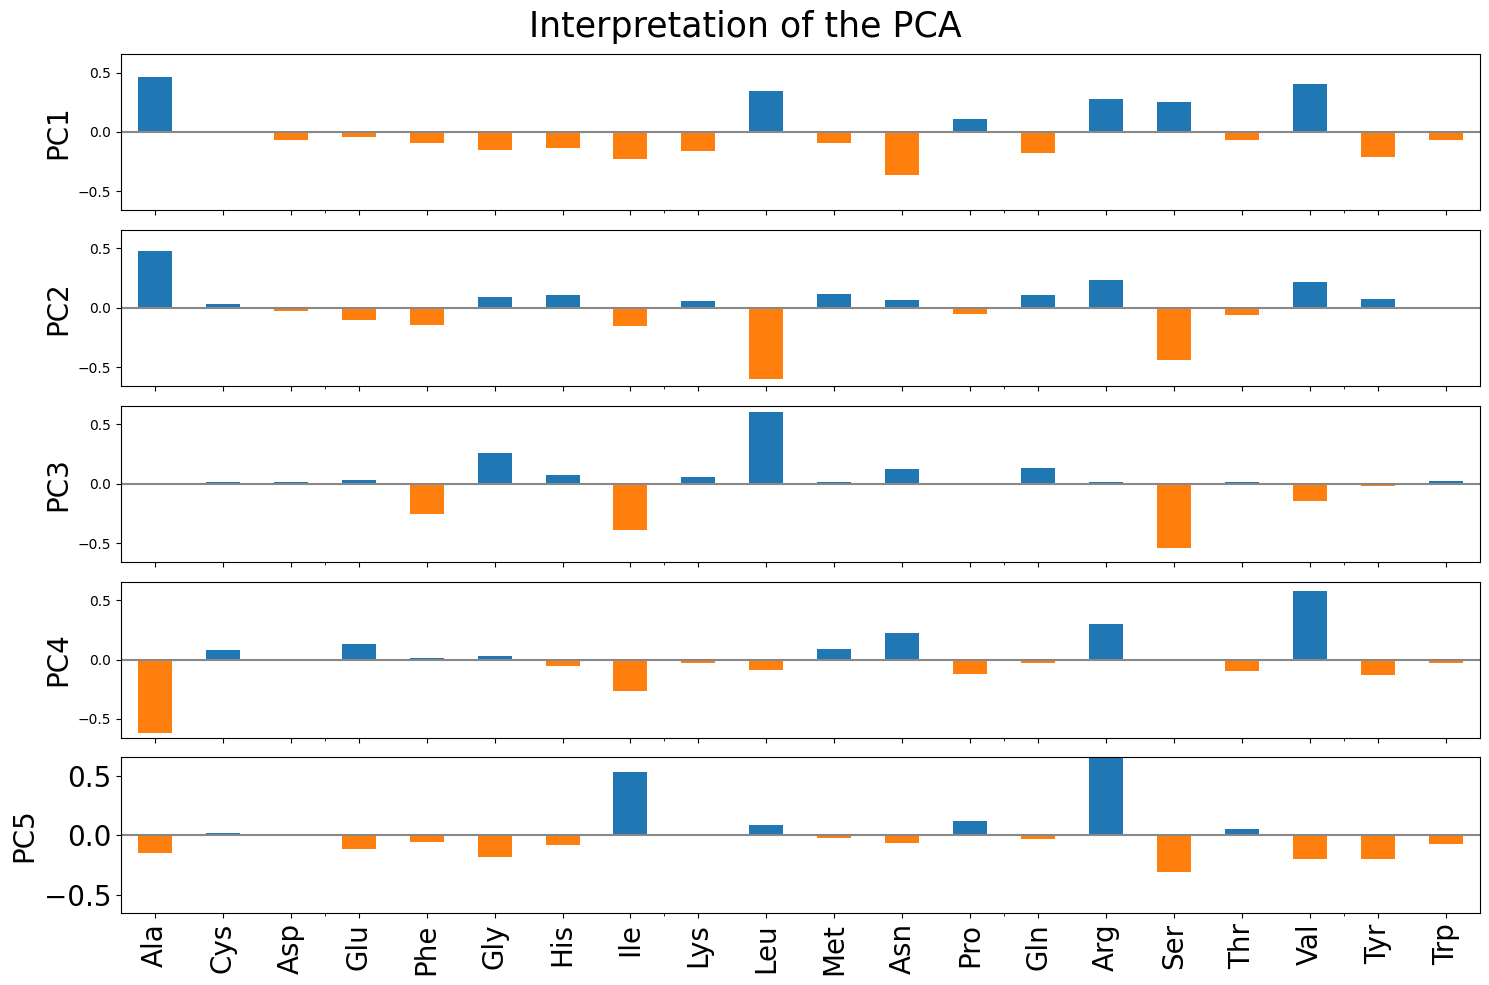

In [122]:
loadings = pd.DataFrame(model.components_[0:5, :], 
                        columns=for_pca.columns)
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5, :])))
f, axes = plt.subplots(5, 1, figsize=(15, 10), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}', fontsize=20)
    ax.set_ylim(-maxPC, maxPC)
plt.suptitle('Interpretation of the PCA', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.show()

In [145]:
features = for_pca_train.columns
ldngs = pca_fit.components_

In [124]:
(ldngs[0]/5).mean()*10000

-1.0174153186603974e-12

In [84]:
model.explained_variance_ratio_[3] * 100

7.242562018186592

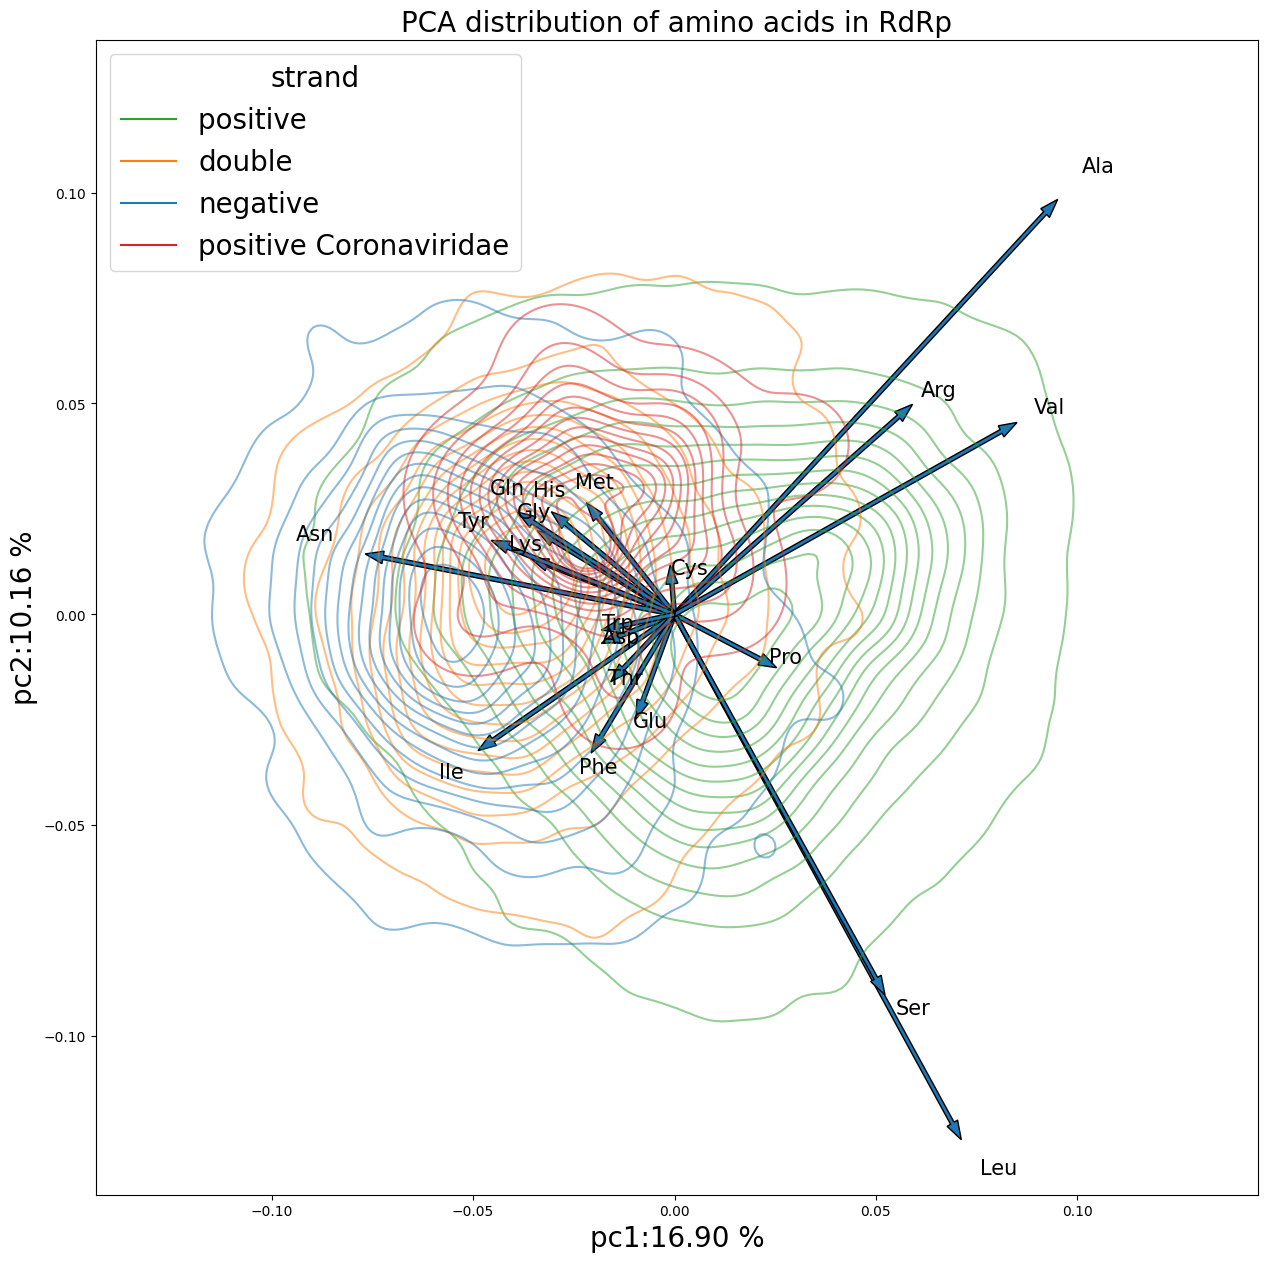

In [146]:
palette = {
    'double': 'tab:orange',
    'positive ': 'tab:green',
    'negative': 'tab:blue',
    'positive Coronaviridae' : 'tab:red'
}
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['legend.loc'] = 'upper left'
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["legend.title_fontsize"] = 20
g=sns.kdeplot(data=pca_data1[pca_data1['taxid'].isna()], x="pc1", y="pc2", hue="strand", alpha=0.5, 
              palette=palette, legend=True, thresh=0.01, levels=15, common_norm=False)

for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i]/5, 
             ldngs[1, i]/5)
    if ldngs[0, i]/5 > (ldngs[0]/5).mean():
        plt.text(ldngs[0, i]/5 * 1.1, 
                ldngs[1, i]/5 * 1.1, 
                feature, fontsize=15)
    else:
        plt.text(ldngs[0, i]/5 * 1.3, 
                ldngs[1, i]/5 * 1.3, 
                feature, fontsize=15)
plt.title("PCA distribution of amino acids in RdRp", fontsize=20)
plt.xlabel("pc1:" + "{:.2f}".format(model.explained_variance_ratio_[0] * 100) + " %", fontsize=20)
plt.ylabel("pc2:" + "{:.2f}".format(model.explained_variance_ratio_[1] * 100) + " %", fontsize=20)

#plt.legend(bbox_to_anchor=(1, 1))
#plt.show()
plt.savefig('../figures/pca_emmadata_arrows.png', bbox_inches='tight')
plt.show()
plt.close()

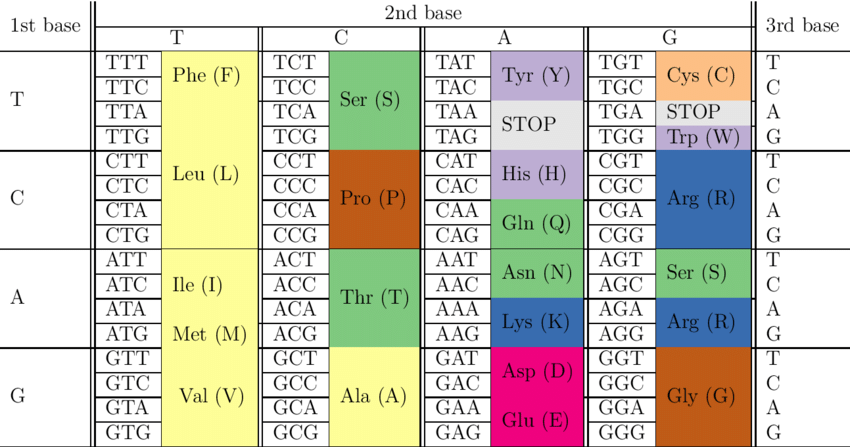

In [129]:
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import make_pipeline
import umap

In [86]:
emma_data = pd.read_csv('../data/FullData.txt', sep='\t')

In [89]:
d = {'C': 'Cys', 'D': 'Asp', 'S': 'Ser', 'Q': 'Gln', 'K': 'Lys',
     'I': 'Ile', 'P': 'Pro', 'T': 'Thr', 'F': 'Phe', 'N': 'Asn', 
     'G': 'Gly', 'H': 'His', 'L': 'Leu', 'R': 'Arg', 'W': 'Trp', 
     'A': 'Ala', 'V':'Val', 'E': 'Glu', 'Y': 'Tyr', 'M': 'Met'}

In [119]:
y = emma_data['Strand'].reset_index(drop=True)
X = emma_data[list(d.keys())]

In [120]:
X['total'] = X.sum(axis=1)
for col in X.columns:
    X[col] = X[col]/X['total']
X = X.drop('total',axis=1)
X = X.fillna(0)

C:\Users\voron\AppData\Local\Temp\ipykernel_15940\4257242466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['total'] = X.sum(axis=1)
C:\Users\voron\AppData\Local\Temp\ipykernel_15940\4257242466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col]/X['total']


In [121]:
X = X.reset_index(drop=True)

In [122]:
y = y.to_frame(name='strand')
y['strand'] = y.strand.astype('category')
#y['strand_num'] = 0

In [123]:
#y[y['strand'] == 'positive '] = 1
#y[y['strand'] == 'negative'] = -1

In [133]:
pd.factorize(y)

ValueError: could not broadcast input array from shape (77208,1) into shape (77208,)

In [130]:
pipe = make_pipeline(PowerTransformer())
X = pipe.fit_transform(X.copy())

y_encoded = pd.factorize(y)[0]

%%time
manifold = umap.UMAP().fit(X, y_encoded)

ValueError: could not broadcast input array from shape (77208,1) into shape (77208,)

In [ ]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=0.5);